In [2]:
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append('../../src')
from paths import FMTD_DB_DIR

from utils.functions import load_datasets_from_csv

from gaps.functions import find_series_gaps, flatten_series_gaps
from gaps.plots import show_gaps

from outliers.functions import find_outliers
from outliers.plots import show_outliers


from plot import show_series

In [3]:
sns.set_style({'font.family':'sans', 'font.serif':'Helvetica', 'font.mono':'Helvetica'})
sns.set_context(rc={"font.size":11,"axes.titlesize":14,"axes.labelsize":12})

In [4]:
dts = load_datasets_from_csv(FMTD_DB_DIR).copy()

## 1.1 Preview

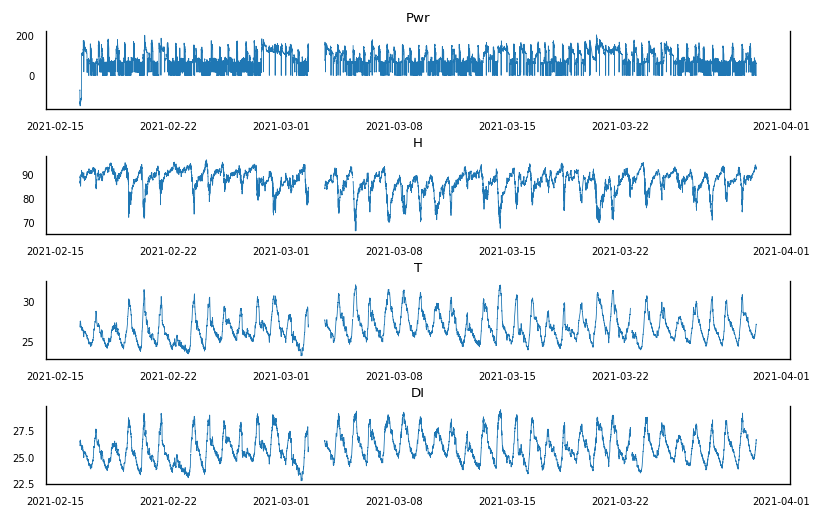

In [5]:
show_series(dts['fridge'])

## 1.2 Missing data

In [7]:
gaps = find_series_gaps(dts['fridge'])

In [8]:
l = list()
for gap in gaps['Pwr']:
    #print(len(hole))
    l.append(len(gap))
pd.Series(l).value_counts()

1      323
11       1
13       1
20       1
61       1
723      1
dtype: int64

In [9]:
l = list()
for gap in gaps['T']:
    #print(len(hole))
    l.append(len(gap))
pd.Series(l).value_counts()

1      323
11       1
13       1
20       1
61       1
723      1
dtype: int64

In [10]:
l = list()
for gap in gaps['H']:
    #print(len(hole))
    l.append(len(gap))
pd.Series(l).value_counts()

1      323
11       1
13       1
20       1
61       1
723      1
dtype: int64

In [11]:
l = list()
for gap in gaps['DI']:
    #print(len(hole))
    l.append(len(gap))
pd.Series(l).value_counts()

1      323
11       1
13       1
20       1
61       1
723      1
dtype: int64

In [12]:
gaps_flat = flatten_series_gaps(gaps)

In [13]:
for key in gaps_flat:
    dts['fridge']['Hole'+key] = np.NaN
    dts['fridge'].loc[gaps_flat[key] , ('Hole'+key)] = 0

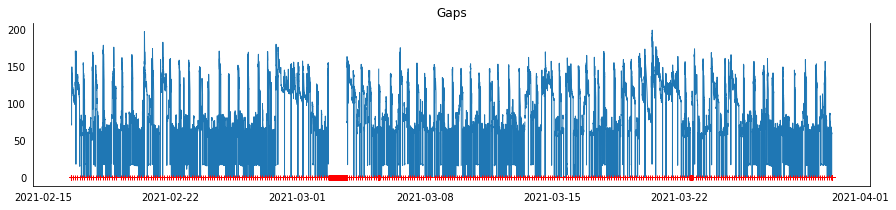

In [14]:
show_gaps(dts['fridge']['Pwr'], dts['fridge']['HolePwr'])

## 1.3 Outliers

In [15]:
fltr = find_outliers(dts['fridge']['Pwr'], 0.0005)
(fltr == True).sum()

30

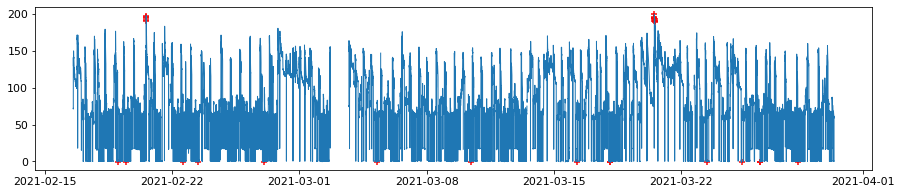

In [16]:
otlrs = dts['fridge'].loc[fltr, 'Pwr']
show_outliers(dts['fridge']['Pwr'], otlrs)

In [17]:
fltr = find_outliers(dts['fridge']['T'], 0.0005)
(fltr == True).sum()

30

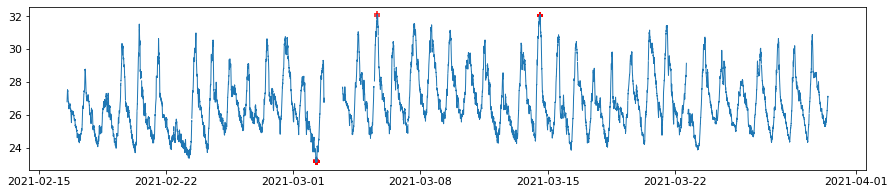

In [18]:
otlrs = dts['fridge'].loc[fltr, 'T']
show_outliers(dts['fridge']['T'], otlrs)

In [19]:
fltr = find_outliers(dts['fridge']['H'], 0.0005)
(fltr == True).sum()

30

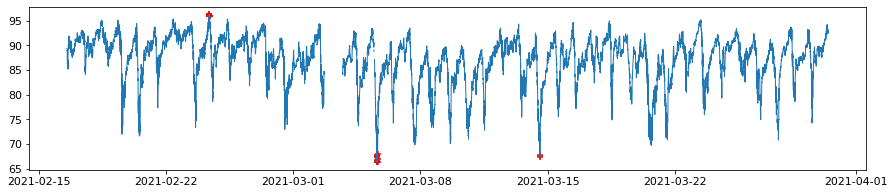

In [20]:
otlrs = dts['fridge'].loc[fltr, 'H']
show_outliers(dts['fridge']['H'], otlrs)

In [21]:
fltr = find_outliers(dts['fridge']['DI'], 0.0005)
(fltr == True).sum()

30

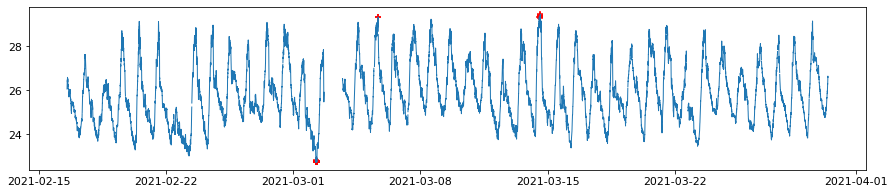

In [22]:
otlrs = dts['fridge'].loc[fltr, 'DI']
show_outliers(dts['fridge']['DI'], otlrs)

## 1.4 Other loads signal

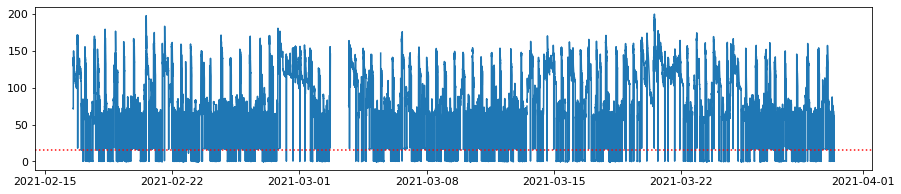

In [23]:
fig, ax = plt.subplots(figsize=(15,3), sharex=True)
ax.plot(dts['fridge']['Pwr'])
ax.axhline(15, color='red', ls='dotted', alpha=0.95)